Đọc code @frontend  đi. 
---

xem cách code như nào ?

Vẽ 1 cái bảng có các tool ở dưới ô 'Cổng thông tin nội bộ'

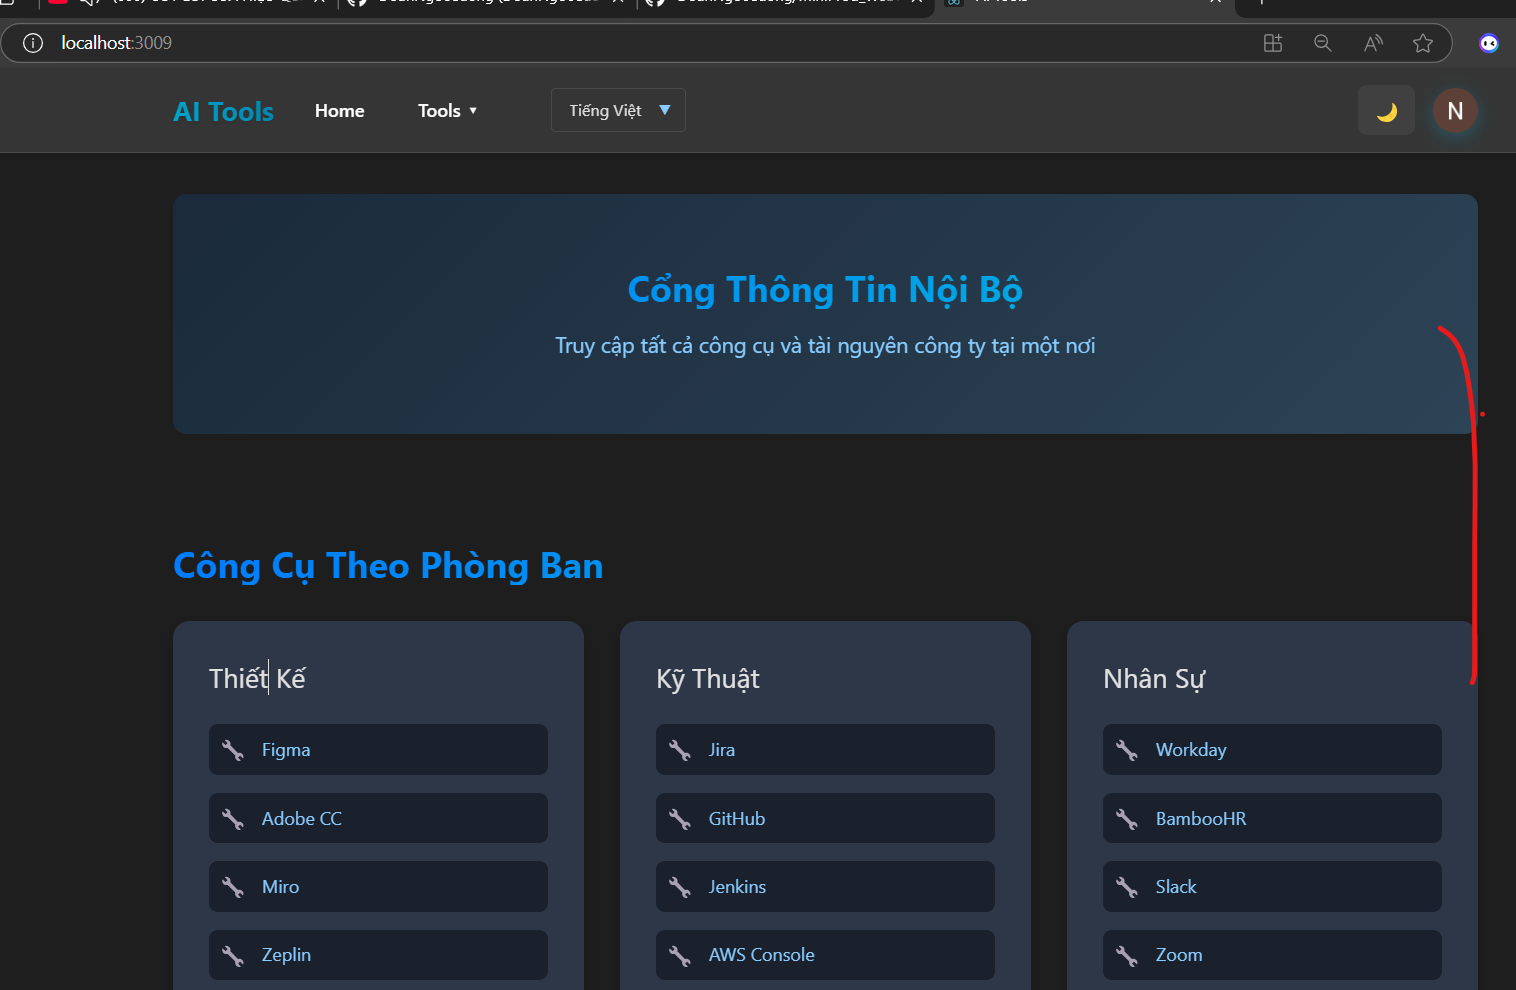

Để hiểu cách hoạt động của phần "Công cụ theo phòng ban", tôi sẽ phân tích từ backend đến frontend:

# 1. Backend Data Structure
```python:backend/app/main/utils/initial_data.py
initial_departments = {
    'engineering': {
        'name_en': 'Engineering',
        'name_vi': 'Kỹ Thuật',
        'tools': ['Jira', 'GitHub', 'Jenkins', 'AWS Console', 'Confluence']
    },
    'design': {
        'name_en': 'Design',
        'name_vi': 'Thiết Kế',
        'tools': ['Figma', 'Adobe CC', 'Miro', 'Zeplin', 'InVision']
    },
    'hr': {
        'name_en': 'Human Resources',
        'name_vi': 'Nhân Sự',
        'tools': ['Workday', 'BambooHR', 'Slack', 'Zoom', 'ATS System']
    }
}
```

# 2. Frontend Flow

## a) API Call trong App.js
```javascript:frontend/src/App.js
const loadData = useMemo(() => async () => {
  if (!i18n.language) return;
  try {
    // Get departments
    const departmentData = await apiService.getDepartments(i18n.language);
    setDepartments(departmentData);
  } catch (error) {
    console.error('Error loading data:', error);
  }
}, [i18n.language]);
```

## b) Home Component
```javascript:frontend/src/pages/Home/index.js
const Home = ({ departments, t }) => {
  return (
    <main className="main-content">
      {/* Hero section */}
      
      {/* Departments section */}
      <section className="departments-section">
        <h2 className="highlight-title">
          {t('departments.title')}
        </h2>
        <div className="departments-grid">
          {Object.entries(departments).map(([key, dept]) => (
            <div key={key} className="department-card">
              <h3>{dept.name}</h3>
              <div className="tools-list">
                {dept.tools.map((tool, index) => (
                  <div key={index} className="tool-item">
                    <span className="tool-icon">🔧</span>
                    <span className="tool-name">{tool}</span>
                  </div>
                ))}
              </div>
            </div>
          ))}
        </div>
      </section>
    </main>
  );
};
```

## c) CSS Styling
```css:frontend/src/styles/sections.css
.departments-section {
  margin: 2rem 0;
}

.departments-grid {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
  gap: 2rem;
}

.department-card {
  background: var(--card-bg);
  padding: 1.5rem;
  border-radius: 8px;
  box-shadow: 0 2px 4px rgba(0,0,0,0.1);
}

.tools-list {
  margin-top: 1rem;
}

.tool-item {
  display: flex;
  align-items: center;
  padding: 0.5rem;
  margin: 0.5rem 0;
  background: var(--tool-bg);
  border-radius: 4px;
}
```

# 3. Luồng Hoạt Động

1. **Khởi tạo Data:**
   - Backend lưu trữ department data trong database
   - Data được khởi tạo từ `initial_data.py`

2. **API Request:**
   - Frontend gọi API khi component mount
   - Language được truyền vào để lấy đúng tên phòng ban

3. **State Management:**
   - Data được lưu trong state của App component
   - Được truyền xuống Home component qua props

4. **Rendering:**
   - Home component map qua departments
   - Mỗi department render một card
   - Mỗi card hiển thị tools của department đó

5. **Styling:**
   - Grid layout cho departments
   - Card design cho mỗi department
   - Responsive design cho mobile

# 4. Tính Năng

1. **Đa ngôn ngữ:**
   - Tên phòng ban theo ngôn ngữ
   - UI text được translate

2. **Responsive:**
   - Grid layout tự điều chỉnh
   - Mobile-friendly design

3. **Theme Support:**
   - Dark/Light mode
   - Custom CSS variables

4. **Performance:**
   - Memoized data loading
   - Optimized rendering

Đây là một thiết kế module rất clean và maintainable, với separation of concerns rõ ràng và xử lý data hiệu quả.
